![title](./00_titleimage.png)
## Predicting Employee Attrition
---
- IBM 데이터 과학자들이 만든 가상의 HR 데이터셋입니다.
- 1,470명에 대한 35개의 변수가 기록되어 있고, 종속변수는 <b>Attrition</b>, 즉 0 또는 1의 퇴사 여부입니다.
- Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## 순서
0. 패키지 import
1. 데이터 설명 및 전처리
2. EDA
3. 예측을 위한 데이터 처리
4. 머신러닝 알고리즘을 이용한 퇴사자 예측
5. 이후의 방향

## 0. 패키지 import
---
### 0.1 필요한 패키지 import

In [1]:
from collections import OrderedDict

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# 모델 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb


# EDA package
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl


# warnings 끄기
warnings.filterwarnings('ignore')

# pandas display option view row & columns
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

# # matplotlib set
plt.rc('font', family='AppleGothic') # For MacOS
plt.rc('axes', unicode_minus=False)

%matplotlib inline

/Users/hmkim/.pyenv/versions/MLproject_HR/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<br>

## 1. 데이터 설명 및 전처리
---

### 1.1 데이터 로드 및 체크

In [18]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


1. Age : 해당 직원의 나이
2. Attrition : 퇴직 여부 Target값 (종속변수)
3. BusinessTravel : 출장의 빈도
4. DailyRate : 일 대비 급여의 수준
5. Department : 업무분야
6. DistanceFromHome : 집과의 거리
7. Education : 교육의 정도
    - 1 : 'Below College' : 대학 이하
    - 2 : 'College' : 전문대
    - 3 : 'Bachelor' : 학사
    - 4 : 'Master' : 석사
    - 5 : 'Doctor' : 박사
8. EducationField : 전공
9. EmployeeCount : 직원 숫자
10. EmployeeNumber : 직원 ID
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
12. Gender : 성별
13. HourlyRate : 시간 대비 급여의 수준
14. JobInvolvement : 업무 참여도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
15. JobLevel : 업무의 수준
16. JobRole : 업무 종류
17. JobSatisfaction : 업무 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
18. MaritalStatus : 결혼 여부
19. MonthlyIncome : 월 소득
20. MonthlyRate : 월 대비 급여 수준
21. NumCompaniesWorked : 일한 회사의 수
22. Over18 : 18세 이상
23. OverTime : 규정외 노동시간
24. PercentSalaryHike : 급여의 증가분 백분율
25. PerformanceRating : 업무 성과
    - 1 : 'Low'
    - 2 : 'Good'
    - 3 : 'Excellent'
    - 4 : 'Outstanding'
26. RelationshipSatisfaction : 대인관계 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
27. StandardHours : 표준 시간
28. StockOptionLevel : 스톡옵션 정도
29. TotalWorkingYears : 경력 기간
30. TrainingTimesLastYear : 교육 시간
31. WorkLifeBalance : 일과 생활의 균형 정도
    - 1 : 'Bad'
    - 2 : 'Good'
    - 3 : 'Better'
    - 4 : 'Best'
32. YearsAtCompany : 근속 연수
33. YearsInCurrentRole : 현재 역할의 년수
34. YearsSinceLastPromotion : 마지막 프로모션
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

- 총 독립변수 : 34개, 종속변수 1개 확인 됩니다.

<br>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, JobLevel, StockOptionLevel, NumCompaniesWorked
- 위의 컬럼들이 실제론 Category column인데, int형으로 되어있습니다.
- int형 컬럼들을 Category 컬럼으로 바꿔주어야 EDA 할때 조금더 편합니다. \<int형 26개, category형 9개>

<br>

### 1.2 데이터값을 Object로 변경

In [20]:
# Education
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [21]:
# EnvironmentSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [22]:
# JobInvolvement
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [23]:
# JobSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [24]:
# PerformanceRating
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [25]:
# RelationshipSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [26]:
# WorkLifeBalance
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [27]:
# JobLevel, StockOptionLevel, TrainingTimesLastYear, NumCompaniesWorked, TotalWorkingYears
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,Excellent,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,Excellent,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Outstanding,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,Excellent,Very High,80,0,17,3,Good,9,6,0,8


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

- EDA 과정을 하기 위해 Category Columns는 object 형식으로 변환함
- \<int형 16개, Category형 19개>

<br>

### 1.3 결측치 확인

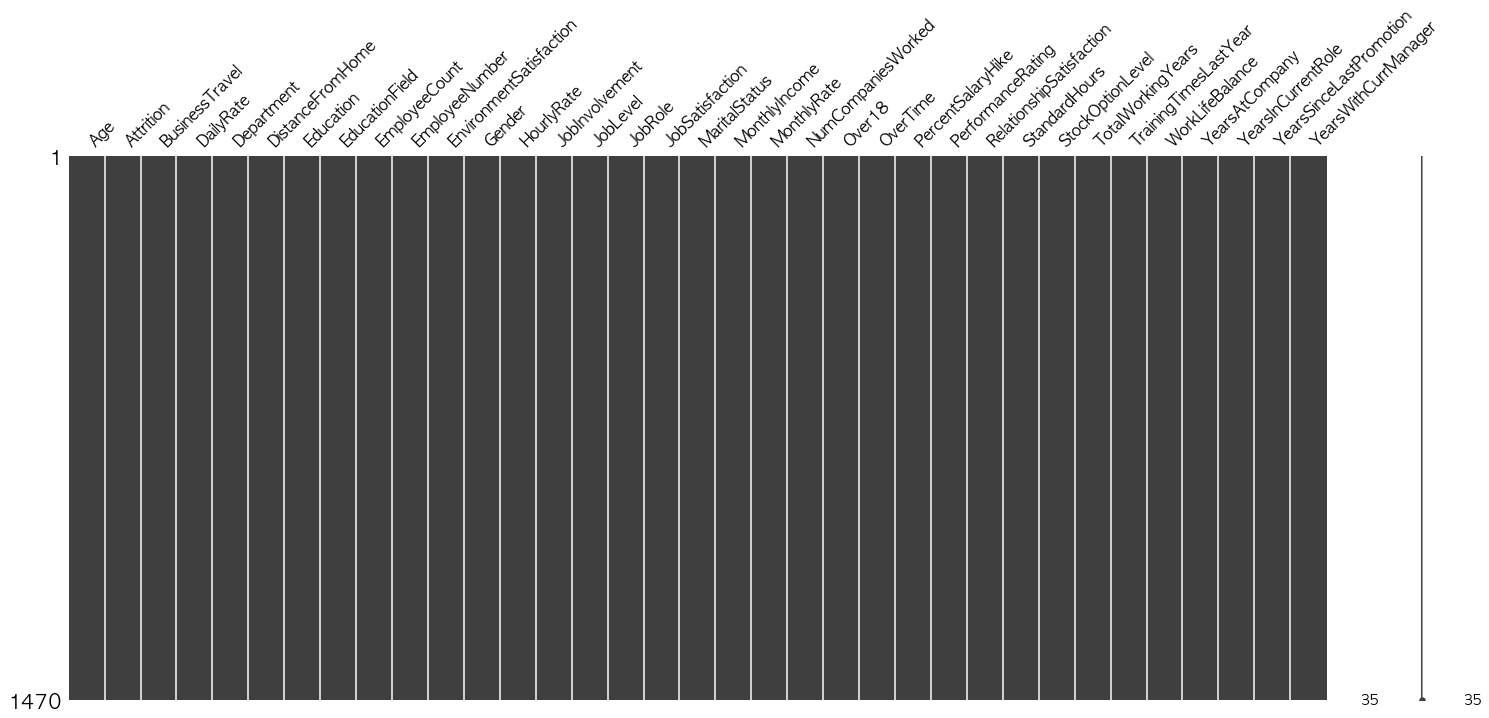

In [14]:
missingno.matrix(data)
plt.show()

- Missingno 패키지를 통해 Null 데이터가 있는지 시각화 해보았습니다.
- 총 1470 데이터 중에 Null 데이터는 없는것으로 확인됩니다.
- 만일 있다면 중간값, 삭제, 평균 값 등으로 채워주거나 혹은 해당 데이터 행 자체를 삭제 해야합니다.
- 만일 Null data를 임의적으로 0혹은 999와 같이 일괄적인 값으로 채워넣었다면 여기서 확인은 어렵습니다.

<br>

## 3. Feature Engineering
---

In [39]:
# EmployeeCount, StandardHours, Over18, EmployeeNumber
# EDA 과정에서 Drop된 data로 만들어주기 위해
print('Over18 :', data['Over18'].unique()[0])
print('EmployeeCount :', data['EmployeeCount'].unique()[0])
print('StandardHours :', data['StandardHours'].unique()[0])
print('EmployeeNumber :', data['EmployeeNumber'].unique()[0])
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
print(data.shape)
data.tail()

### 3.1 Label Encoding

In [49]:
ls = [column for column in data.columns if data[column].dtype != int]
data[ls] = data[ls].apply(LabelEncoder().fit_transform)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,0,1,7,3,2,5993,19479,8,1,11,0,1,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,1,1,0,1,61,2,1,6,2,1,5130,24907,1,0,23,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,1,92,2,0,2,0,2,2090,2396,6,1,15,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,4,1,3,0,56,0,0,6,0,1,2909,23159,1,1,11,0,0,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,0,0,2,2,1,3468,16632,9,0,12,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,0,1,41,3,1,2,3,1,2571,12290,4,0,17,0,0,1,17,3,2,5,2,0,3
1466,39,0,2,613,1,6,1,3,3,1,42,2,2,0,1,1,9991,21457,4,0,15,0,1,1,9,5,2,7,7,1,7
1467,27,0,2,155,1,4,0,1,2,1,87,3,1,4,2,1,6142,5174,1,1,20,1,2,1,6,0,2,6,2,0,3
1468,49,0,1,1023,2,2,0,3,3,1,63,2,1,7,2,1,5390,13243,2,0,14,0,3,0,17,3,3,9,6,0,8


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

- 모든 데이터에 대해 Label Encoding을 실시하였습니다.

## 4. 예측을 위한 데이터 처리
---

### 4.1 X, y 분리

In [51]:
X = data.drop(labels= 'Attrition', axis = 1)
y = data.Attrition

- data를 타겟값y와 독립변수들의 모임인 x로 나누어줌
<br>

### 4.2 Scaler and Onehot-encoder

In [52]:
numeric_features = [column for column in X.columns if X[column].dtype != object]
numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')), # 결측치 대치
    ('scaler', StandardScaler())])

categorical_features = [column for column in X.columns if X[column].dtype == object]
categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # 결측치 대치
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


- 데이터를 받으면 숫자형은 standardscaler를 카테고리형은 onehot encoding을 하는 전처리기(prepocessor) 생성
- Pipe라인에 넣으면 따로 데이터에 무언갈 하지 않아도 자동으로 scaler와 onehot encoding을 해줌

<br>

### 3.2 train, test 분리

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 87 )

In [54]:
train_rate = round(y_train.sum() / len(y_train),2)
test_rate = round(y_test.sum() / len(y_test),2)
print(f'학습 데이터에서의 Target 비율 : {train_rate}')
print(f'테스트 데이터에서의 Target 비율 : {test_rate}')

학습 데이터에서의 Target 비율 : 0.16
테스트 데이터에서의 Target 비율 : 0.16


- 학습 데이터와 테스트 데이터를 분리하면서 stratify 옵션을 주어 Target값의 비율을 동일하게 맞추었습니다.(16%)

<br>

### 3.3 Learning Curve 함수 준비

In [55]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'accuracy'):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt.show()

- Gridsearch와 title, x, y값을 넣으면 Learning Curve를 볼수 있는 함수
- Learning Curve로 과적합을 판단함

<br>

## 4. 머신러닝 알고리즘을 이용한 퇴사자 예측
---

### 4.1 의사결정나무

In [57]:
clf_model = DecisionTreeClassifier(random_state=87)
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', clf_model)],
                )
params_grid = [{'clf__max_depth': list(range(1, 20, 2)),
                'clf__min_samples_split': [2, 3, 4],
                'clf__min_samples_leaf': list(range(1, 20, 2))
                }]
gridsearch = GridSearchCV(
    estimator=pipe, param_grid=params_grid, cv=5, n_jobs=-1, return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DailyRate',
                                                                          'Department',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EducationField',
             

- 위에서 설정한 pipeline에 의사결정나무에 맞는 파라미터를 설정 후 그리드서치를 진행하였습니다

<br>

In [58]:
scores_df = pd.DataFrame(gridsearch.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']].sort_values('rank_test_score').reset_index(drop = True).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}",0.842106,1,0.837104,0.846154,0.836364,0.854545,0.836364
1,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 4}",0.842106,1,0.837104,0.846154,0.836364,0.854545,0.836364
2,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 3}",0.842106,1,0.837104,0.846154,0.836364,0.854545,0.836364
3,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 19, 'clf__min_samples_split': 2}",0.841205,4,0.837104,0.837104,0.831818,0.850000,0.850000
4,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 19, 'clf__min_samples_split': 3}",0.841205,4,0.837104,0.837104,0.831818,0.850000,0.850000


- 그리드 서치를 진행하여 만들어낸 최적의 파라미터들입니다. rank_test_score가 1인것이 1등 파라미터입니다.

<br>

In [59]:
result = gridsearch.best_estimator_.predict(X_test)
accuracy_score(y_test, result)

0.8586956521739131

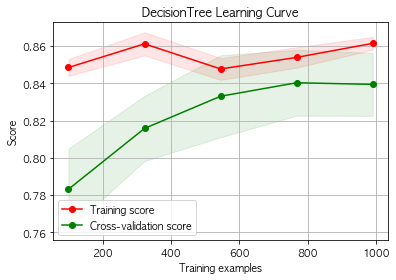

In [60]:
plot_learning_curve(gridsearch.best_estimator_,
                    'DecisionTree Learning Curve', X_train, y_train, cv = 10)

- Learning Curve가 원하는 Accuracy보다 낮은것으로 보아, 과소적합 되는듯 함
- 우상향하는 그래프인것으로 보아 더 상승할 여지가 있어보임.

<br>

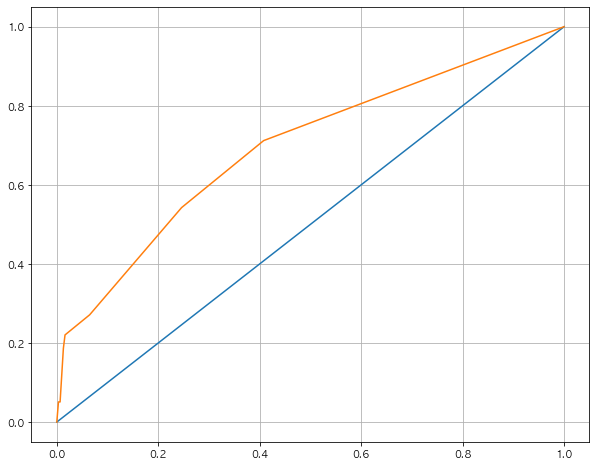

In [61]:
pred_proba = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

### 4.2 랜덤포레스트

In [62]:
rf_model = RandomForestClassifier(random_state=87)

# parameters
n_estimators = [100, 150]
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]

pipe = Pipeline([('preprocessor', preprocessor),
                 ('rf', rf_model)],
                )

params_grid = [{'rf__n_estimators': n_estimators,
                'rf__max_depth': max_depth,
                'rf__min_samples_split': min_samples_split,
                'rf__min_samples_leaf': min_samples_leaf,
               }]

gridsearch = GridSearchCV(
    estimator=pipe, param_grid=params_grid, cv=5, n_jobs=-1, return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DailyRate',
                                                                          'Department',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EducationField',
             

In [63]:
result = gridsearch.best_estimator_.predict(X_test)
accuracy_score(y_test, result)

0.845108695652174

In [64]:
scores_df = pd.DataFrame(gridsearch.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']].sort_values('rank_test_score').reset_index(drop = True).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}",0.861172,1,0.855204,0.855204,0.859091,0.863636,0.872727
1,"{'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 150}",0.860263,2,0.859729,0.850679,0.868182,0.859091,0.863636
2,"{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 150}",0.860259,3,0.859729,0.855204,0.859091,0.863636,0.863636
3,"{'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}",0.859362,4,0.850679,0.850679,0.859091,0.868182,0.868182
4,"{'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}",0.859362,4,0.850679,0.850679,0.859091,0.868182,0.868182


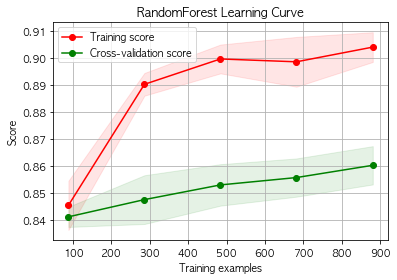

In [65]:
plot_learning_curve(gridsearch.best_estimator_, 'RandomForest Learning Curve',X_train, y_train)

- train과 test의 Accuracy의 차이가 많이나는것을 볼수 있습니다.
- train score는 높은데, test score는 낮은것으로 보아 과적합 입니다.

<br>

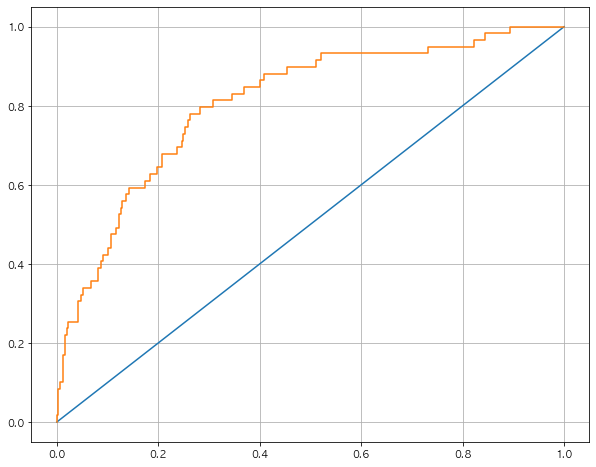

In [66]:
pred_proba = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

- 앙상블 알고리즘의 하나인 의사결정나무의 모임인 랜덤포레스트 알고리즘으로 예측해본 결과 84%의 정확도가 나왔습니다.
- 의사결정나무보단 좋아 보이지만 그래도 아직 모자라 보입니다.

<br>

### 4.3 로지스틱 회귀

In [67]:
lr_model = LogisticRegression(solver='liblinear')

# parameters

pipe = Pipeline([('preprocessor', preprocessor),
                 ('lr', lr_model)],
                )

params_grid = [{}]

gridsearch = GridSearchCV(
    estimator=pipe, param_grid=params_grid, cv=5, n_jobs=-1, return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DailyRate',
                                                                          'Department',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EducationField',
             

- 분류 문제에서 사용하는 회귀문제중에 로지스틱 회귀를 사용한 결과 랜덤포레스트와 같이 84%의 정확도가 나왔습니다.
- 랜덤포레스트와 똑같지만, 아직 만족스러운 결과는 아닙니다.

<br>

In [68]:
result = gridsearch.best_estimator_.predict(X_test)
accuracy_score(y_test, result)

0.8396739130434783

In [69]:
scores_df = pd.DataFrame(gridsearch.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']].sort_values('rank_test_score').reset_index(drop = True).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,{},0.861144,1,0.873303,0.868778,0.85,0.845455,0.868182


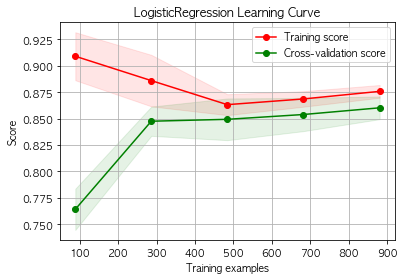

In [70]:
plot_learning_curve(gridsearch.best_estimator_, 'LogisticRegression Learning Curve',X_train, y_train)

- 과소 적합

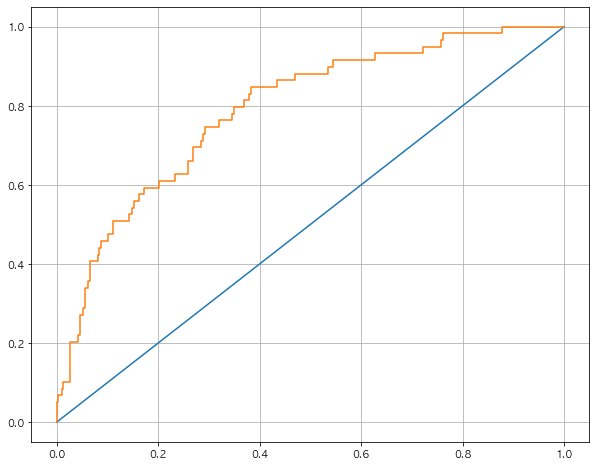

In [71]:
pred_proba = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

### 4.4 xgboost

In [72]:
xgb_model = xgb.XGBClassifier()

# parameters

pipe = Pipeline([('preprocessor', preprocessor),
                 ('xgb', xgb_model)],
                )

params_grid = [{
}]

gridsearch = GridSearchCV(
    estimator=pipe, param_grid=params_grid, cv=5, n_jobs=-1, return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DailyRate',
                                                                          'Department',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EducationField',
             

In [73]:
result = gridsearch.best_estimator_.predict(X_test)
accuracy_score(y_test, result)

0.8532608695652174

In [74]:
scores_df = pd.DataFrame(gridsearch.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']].sort_values('rank_test_score').reset_index(drop=True).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,{},0.855738,1,0.819005,0.868778,0.845455,0.881818,0.863636


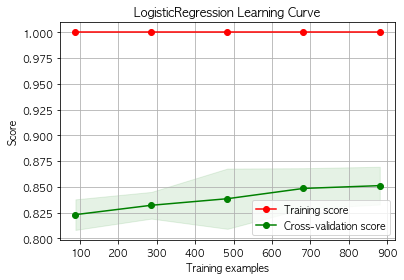

In [75]:
plot_learning_curve(gridsearch.best_estimator_, ' LogisticRegression Learning Curve',X_train, y_train)

- 과소 적합

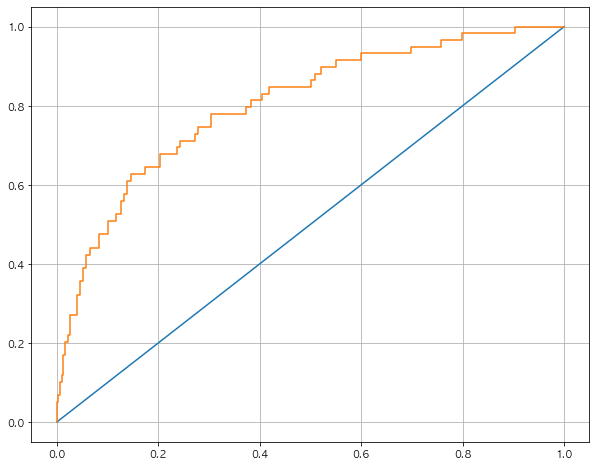

In [76]:
pred_proba = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

- 앙상블 모델인 Xgboost를 이용하여 예측한 결과 85%의 정확도를 보입니다.
- 가장 높은 수치이지만 만족스럽지 못합니다.

<br>

### 4.5 결론
- 일단 데이터 Feature Engineering이 거의 없는 상태에선 대부분의 알고리즘의 과소적합으로 나온다. 아마도 Feature Engineering을 더 진행해야 할듯 하다.

<br>

## 5. Feature Engineering - 2
---
### 5.1 Age

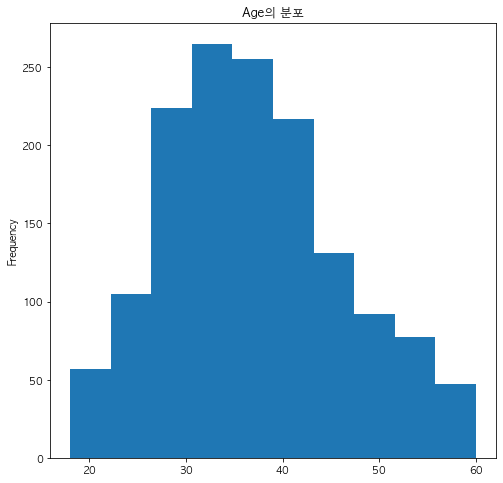

In [89]:
plt.figure(figsize=(8,8))
plt.title('Age의 분포')
data['Age'].plot(kind = 'hist')
plt.show()

In [95]:
data['Age'].value_counts().reset_index()

,index,Age
0,35,78
1,34,77
2,31,69
3,36,69
4,29,68
5,32,61
6,30,60
7,33,58
8,38,58
9,40,57


ㅁ

## 5. 이후의 방향
---
### 5.1 머신러닝 기법의 세분화
- 사실 Chepter 4에서 했던 예측들은 그냥 알고리즘을 가져와서 아무런 셋팅없이 진행한것 입니다.
- 따라서, 알고리즘의 파라미터들을 수정하여 예측력을 더 올려야합니다.

<br>

### 5.2 정확도의 기준
- 사실 Target의 비율이 16%이므로, 모든 데이터에 퇴사하지 않는다 라고 예측해도 84%의 정확도를 가집니다.
- 이말인즉슨 최소한 84%는 나와야하고 이것보다 낮다는것은 성능이 좋지 않다는 이야기입니다.
- 따라서, 파라미터 셋팅, 그리드서치등을 이용하여 일단 성능을 더 좋게 나오게 만들어야합니다.

<br>

### 5.3 추가적인 EDA
- EDA 부분에서 더 많은 인사이트를 얻지 못하여 변수의 삭제, 추가적인 방향이 없었습니다. 해당부분의 추가적인 보완이 필요합니다.

In [92]:



estimators = [('scaler', MinMaxScaler()),
              ('clf', DecisionTreeClassifier(random_state=87)),]
#               ('rf', RandomForestClassifier(random_state=87))]



In [94]:



#                'rf__n_estimators': [100, 200, 300, 400]}]



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=87))]),
             n_jobs=-1, param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [95]:
gridsearch.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('clf', DecisionTreeClassifier(max_depth=4, random_state=87))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'clf': DecisionTreeClassifier(max_depth=4, random_state=87),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': 4,
 'clf__max_features': None,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_impurity_split': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__presort': 'deprecated',
 'clf__random_state': 87,
 'clf__splitter': 'best'}

In [67]:
accuracy_score(y_test,gridsearch.best_estimator_.predict(X_test))

0.8288043478260869

In [69]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00311236, 0.00433178, 0.0075696 , 0.00780277]),
 'std_fit_time': array([0.0001426 , 0.00029346, 0.00016187, 0.00032953]),
 'mean_score_time': array([0.00050621, 0.00065985, 0.00074525, 0.00067196]),
 'std_score_time': array([4.09964612e-05, 9.45314002e-05, 1.33672467e-04, 1.12719261e-04]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.83710407, 0.83257919, 0.80542986, 0.79638009]),
 'split1_test_score': array([0.84162896, 0.83257919, 0.85067873, 0.79638009]),
 'split2_test_score': array([0.82272727, 0.84090909, 0.8       , 0.79090909]),
 'split3_test_score': array([0.83636364, 0.84090909, 0.8       , 0.75909091]),
 'split4_test_score': array([0.83636364, 0.82727273, 0.80909091, 0.78636364]),
 'mean_test_scor